<h5>Importing packages</h5>

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

import pandas as pd
import io
import matplotlib.pyplot as plt

<h5>reading the seeds data from txt file as pandas dataframe</h5>

In [2]:
with open("./seeds/seeds_dataset.txt", "r") as file:
    data = file.read().replace('\t\t', '\t')

file_like_object = io.StringIO(data)

df = pd.read_csv(file_like_object, delimiter='\t', header=None)
wheat_type_mapping = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}

features = [ 'area', 'perimiter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymetry_coefficient', 'length_of_kernel_groove', 'wheat_type']
df.columns = features
df['wheat_type'] = df['wheat_type'].replace(wheat_type_mapping)

df.info()
df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimiter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   asymetry_coefficient     210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   wheat_type               210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.3+ KB


,area,perimiter,compactness,length_of_kernel,width_of_kernel,asymetry_coefficient,length_of_kernel_groove,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,Kama
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,Kama
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,Kama


In [3]:
wheat_instances = pd.crosstab(index=df["wheat_type"], columns="count")      
wheat_instances

col_0,count
wheat_type,
Canadian,70
Kama,70
Rosa,70


<h5>Instantiate the clustering model and KElbowVisualizer visualizer</h5>

Optimal K:	4


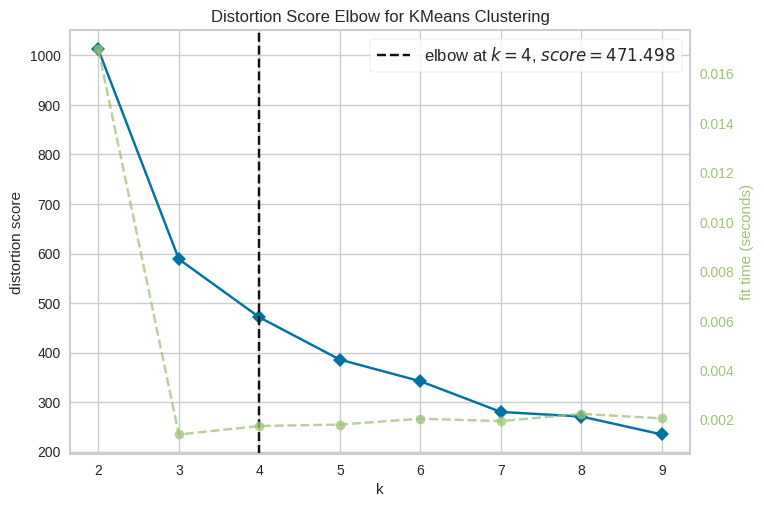

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
X = df.iloc[:, list(range(7)),].to_numpy()

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)

optimal_k = visualizer.elbow_value_
print( f'Optimal K:\t{optimal_k}' )
visualizer.show()


<h5></5>

<h5>Initiating Kmeans model with optimal_k value from the ElbowVisualizer and fitting the data</h5>

In [5]:
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

<h5>Visualising the clusters with a 2D diagram</h5>

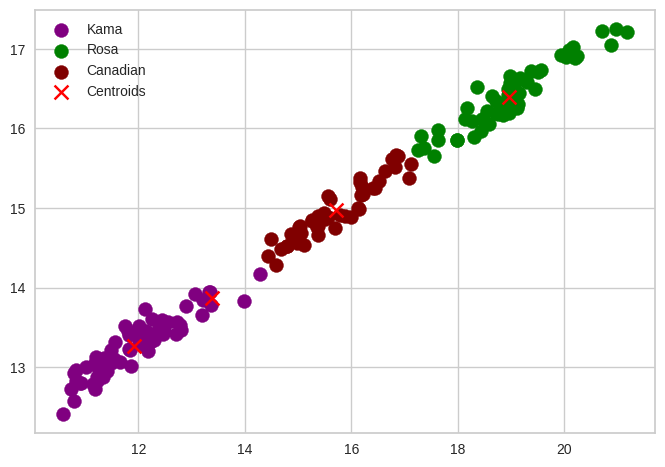

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Kama')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Rosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'maroon', label = 'Canadian')

# adding the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', marker='x', label = 'Centroids')

plt.legend()

<h5>3d scatterplot using matplotlib</h5>

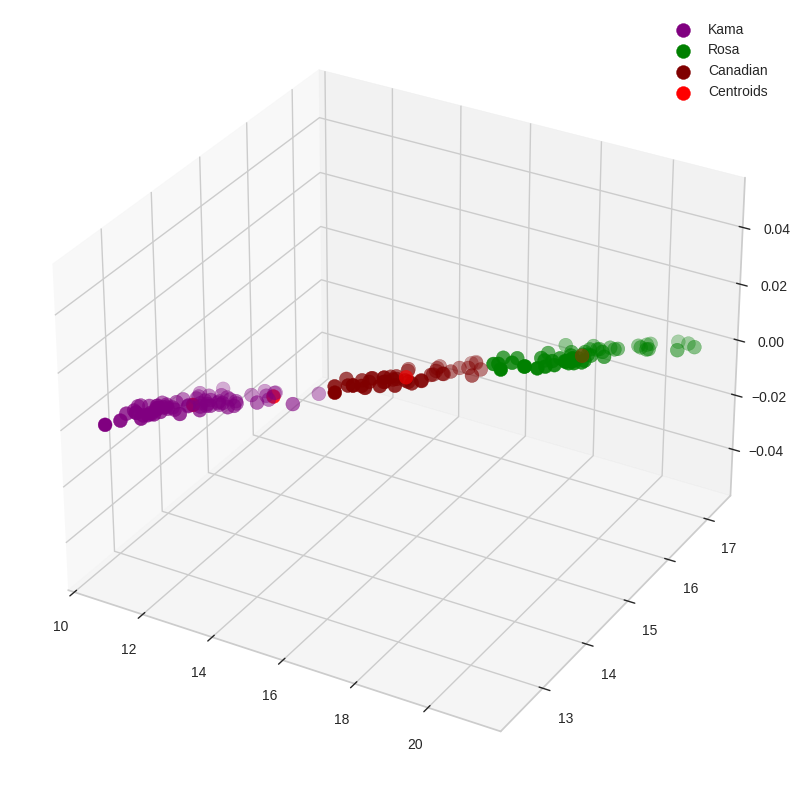

In [7]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Kama')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Rosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'maroon', label = 'Canadian')

# adding the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()